In [3]:
# -*- coding: utf-8 -*-
"""
Created on Sun Dec 29 22:55:50 2019

@author: Parth
"""
import urllib
import collections
import re
from collections import Counter
import pickle 
import string
import numpy as np
import pandas as pd
from textblob import TextBlob
import tweepy

consumer_key='rNrnFupaEqKt0eb7hjbdHKdWg'
consumer_secret= 'DTTMoQOrCBmngaXmOnFhrBjdjwtT54x0AbGvNwwuqyYNWwEvc7'
access_token='1002268050513575936-gGrQUmDiMyCxO2Y88lc3ojqNzbtLGm'
access_token_secret='G572YTe2S5TQTTaXhFvl1WyNopa8ilrkgWSlCXBZQwU4C'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)



In [ ]:
User = "@N_Hiranandani"
# Cursor is the search method this search query will return 20 of the users latest favourites just like the php api you referenced
fav_tweets=list()
author=list()

for favorite in tweepy.Cursor(api.favorites, id=User).items(1000):
    
    #print('\n\n\nTweet Author:')
    # Print the screen name of the tweets auther
    #print('Screen Name: '+str(favorite.user.screen_name.encode("utf-8")))
    #print('Name: '+str(favorite.user.name.encode("utf-8")))
    author.append(favorite.user.name)
    

    #Basic information about the tweet that was favorited
 #   print('\nTweet:')
    # Print the id of the tweet the user favorited
#    print('Tweet Id: '+str(favorite.id))
    # Print the text of the tweet the user favorited
    #print('Tweet Text: '+str(favorite.text.encode("utf-8")))
    fav_tweets.append(favorite)

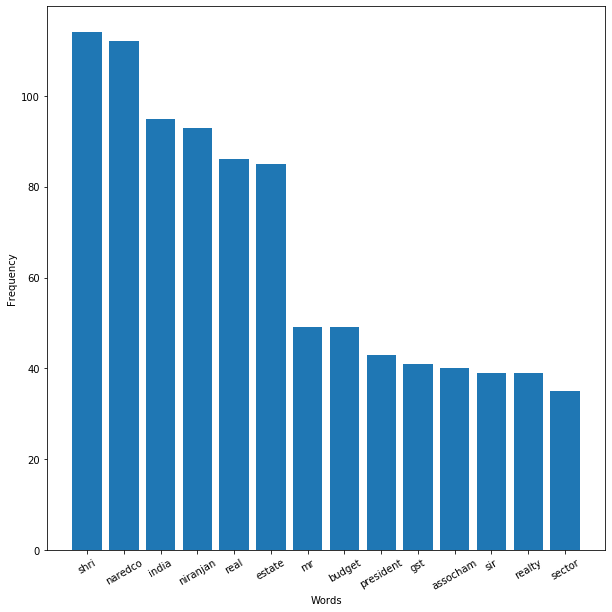

In [35]:
import active
import pandas as pd
from textblob import TextBlob



from nltk import word_tokenize
import nltk
nounlist=list()
for i in fav_tweets:
    try:
        text1 = active.deEmojify(i.text) 
        text2=active.clean_tweet(text1)
        text=text2.replace('&amp;', ' ')
        blob = TextBlob(text)
        for nouns in blob.noun_phrases:
            nounlist.append(nouns)


    except Exception as e:
        continue
        
        
li1=pd.Series(nounlist)

active.wordcloud(li1)


In [36]:
ath=pd.Series(author)
active.wordcloud(ath)

TypeError: sequence item 0: expected str instance, bytes found